# Wine Dataset EDA
For the first lab, we were assigned the task of predicting the 'quality' target variable from the 'winequalityN.csv' dataset. The initial phase of our project consisted in extensive ecploratory data analysis, in order to better understand the characteristics of the information. Then, this notebook's findings were employed to build different predictive models.

Numerous Python libraries were employed to achieve the task, given how they represent powerful inspection instruments.

In [1]:
import seaborn as sns
import numpy as np
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import hopsworks
import pandas as pd
import ssl

2023-12-02 15:35:47,305 INFO: generated new fontManager


A connection to Hopsworks was established to efficiently handle the dataset's features.

In [2]:
#Connection to hopsworks for feature storage
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://35.204.254.42/p/119
Connected. Call `.close()` to terminate connection gracefully.


For successfully handling the feature group creation, the feature columns needed to be renamed, to avoid causing syntax conflicts. We can take an initial look to the data to chech the number of features, samples, and its overall structure.

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context
wine_df = pd.read_csv("winequalityN.csv")
wine_df.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                        "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can inspect the columns data types to check for consistency. We can see that the 'type' column presents categorical variables instead of numerical ones.

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Given the non-numerical nature of the 'type' feature, we can convert it to a value format with one-hot encoding, mapping the two categorical types to binary values.

In [5]:
wine_df['type'] = wine_df['type'].replace({'white': 0, 'red': 1})
wine_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Another relevant inspection requires considering the presence of null (NaN) values in the dataset. Many feature columns present some missing values.

In [6]:
print(wine_df.isna().sum())

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


To fill missing values with relevant information, we can replace them, considering each numerical column of wine_data, with randomly chosen values from the same column, thus preserving their original distribution. This can be performing by first collecting the non-missing values of each column, and for each missing input selecting a random element from the same vector of data. The columns are randomly filled with the extracted numbers. After this processing, we can see that no column presents missing values.

In [7]:
numerical_cols = wine_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    non_missing = wine_df[col].dropna()
    random_fill = np.random.choice(non_missing, size=wine_df[col].isnull().sum())
    wine_df.loc[wine_df[col].isnull(), col] = random_fill

missing_values_after = wine_df.isnull().sum()
missing_values_after


type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

To further inspect the available information, aggregated values were visualized. Some features present considerably different scales compared to the rest.

In [8]:
#Get descriptive statistics
wine_df.describe()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.218078,0.339571,0.318664,5.446360,0.056045,30.525319,115.744574,0.994697,3.218452,0.531217,10.491801,5.818378
std,0.430779,1.298926,0.164604,0.145260,4.759308,0.035035,17.749400,56.521855,0.002999,0.160819,0.148769,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The distribution of quality and how some prediction features relate to it can be visualized to examine the nature of their correlation. We can see that more than 75% of the samples is represented by only two quality scores (6 and 5), while the scores 3 and 9 present less samples than the rest, leading to possible imbalancement.

In [9]:
quality_counts = wine_df['quality'].value_counts()
print(quality_counts)
quality_percentage = wine_df['quality'].value_counts(normalize=True) * 100
print(quality_percentage)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64


We can visualize this information in a barplot: the dataset shows a largely unequal amount of samples per quality scores.

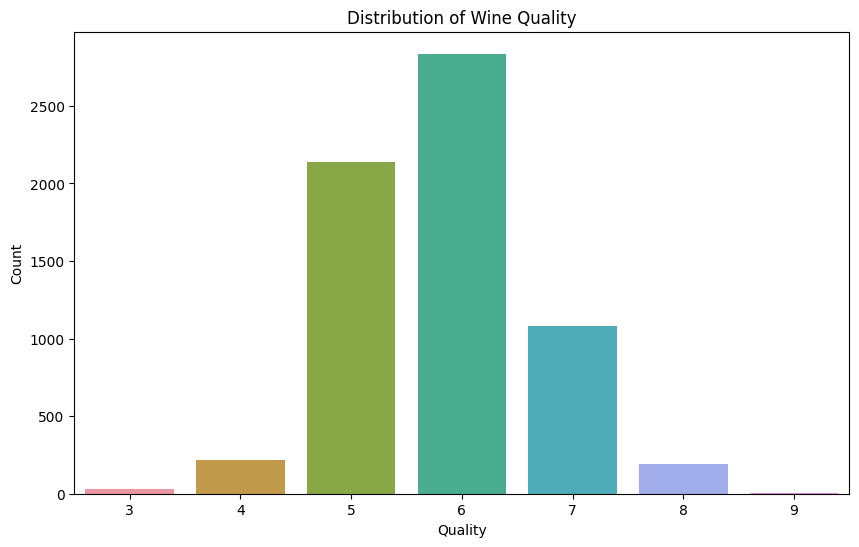

array([3, 4, 5, 6, 7, 8, 9])

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Check unique values in 'quality'
unique_qualities = wine_df['quality'].unique()
unique_qualities.sort()
unique_qualities


The distribution of wine types can be inspected to understand if any notable traits can be highlighted. The majority of wines are of type 'white'. The two categories do not present notable difference in average quality, and we can see that the feature values do not differ much between red and white wines, with the exception of free sulfur dioxide and total sulfur dioxide, that span larger gaps.

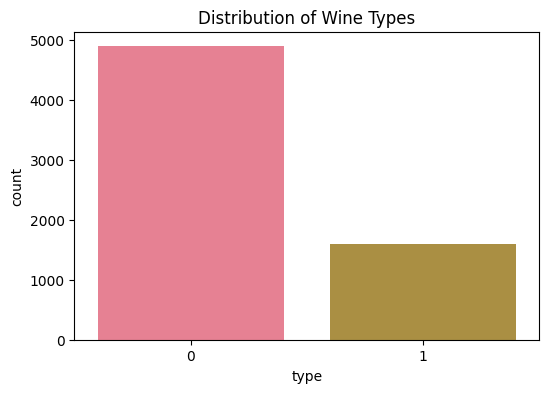

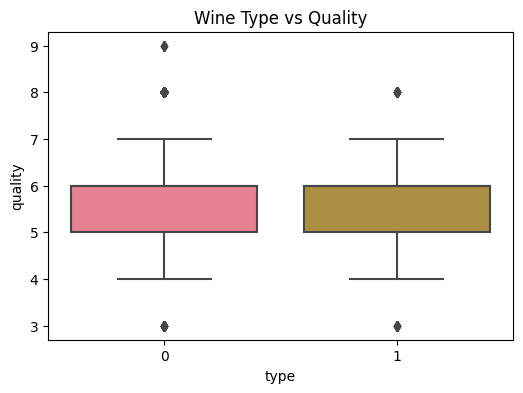

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
0,6.856319,0.278191,0.334183,6.395559,0.045787,35.308085,138.360657,0.994027,3.188218,0.489855,10.514267,5.877909
1,8.326204,0.527589,0.271126,2.538806,0.087467,15.874922,46.467792,0.996747,3.311063,0.657917,10.422983,5.636023


In [11]:
# Countplot to see the distribution of wine types
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=wine_df)
plt.title("Distribution of Wine Types")
plt.show()

# Box plot to see the relationship between wine type and quality
plt.figure(figsize=(6, 4))
sns.boxplot(x='type', y='quality', data=wine_df)
plt.title("Wine Type vs Quality")
plt.show()

# Checking average values of features based on wine type
mean_values_by_type = wine_df.groupby('type').mean()
mean_values_by_type


We can also see that the count of the categorical feature 'type' presents interesting behaviors related to quality. As an example, there is no red (label 1) wine with quality score equal to 9, while most wines in the medium ranges are of type 'white'.

    quality  type  count
0         3     0     20
1         3     1     10
2         4     0    163
3         4     1     53
4         5     0   1457
5         5     1    681
6         6     0   2198
7         6     1    638
8         7     0    880
9         7     1    199
10        8     0    175
11        8     1     18
12        9     0      5


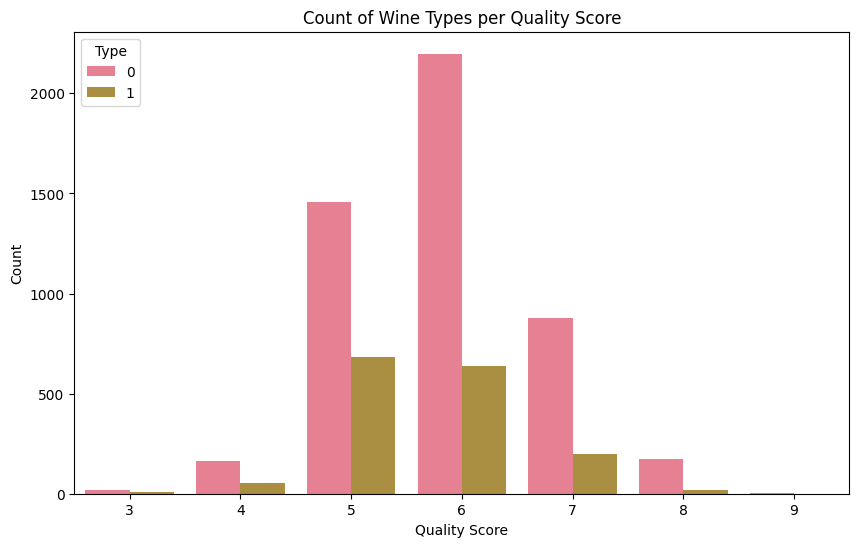

In [12]:
count_per_quality_and_type = wine_df.groupby(['quality', 'type']).size().reset_index(name='count')
print(count_per_quality_and_type)
plt.figure(figsize=(10, 6))
sns.barplot(data=count_per_quality_and_type, x='quality', y='count', hue='type')
plt.title('Count of Wine Types per Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


Another relevant analysis is to see if the dataset presents duplicate rows. Given their elevated number, we can remove them not to make the model encounter the same samples both in training and inference.

In [13]:
number_of_duplicates = wine_df.duplicated().sum()
print("Number of duplicate rows:", number_of_duplicates)

Number of duplicate rows: 1168


In [14]:
wine_df = wine_df.drop_duplicates()
wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,0,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.55,11.2,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Next, we can inspect the distribution of each of the remaining features compared to quality. We can see that there seem sto be no evident linear patterns, and the relationship appears more complex.

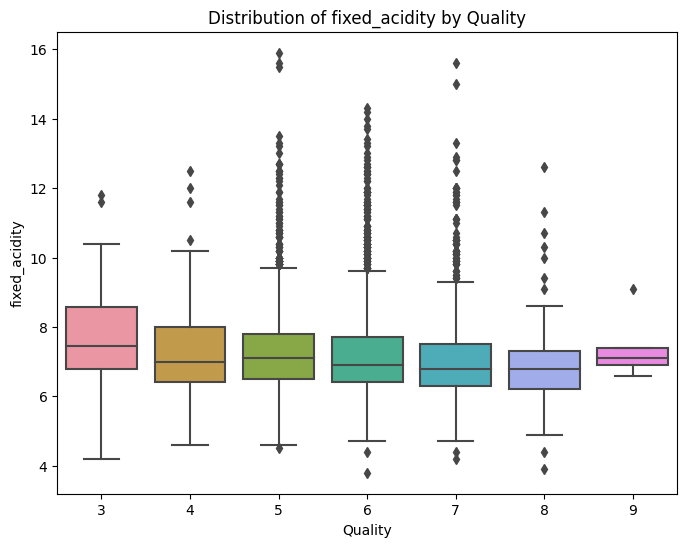

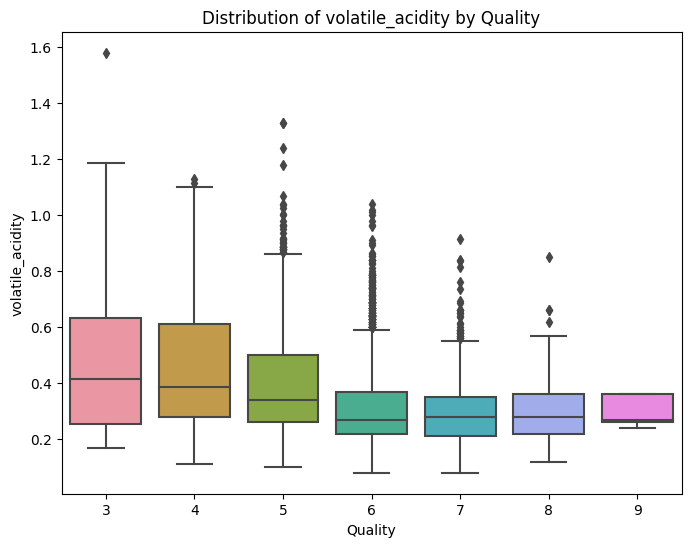

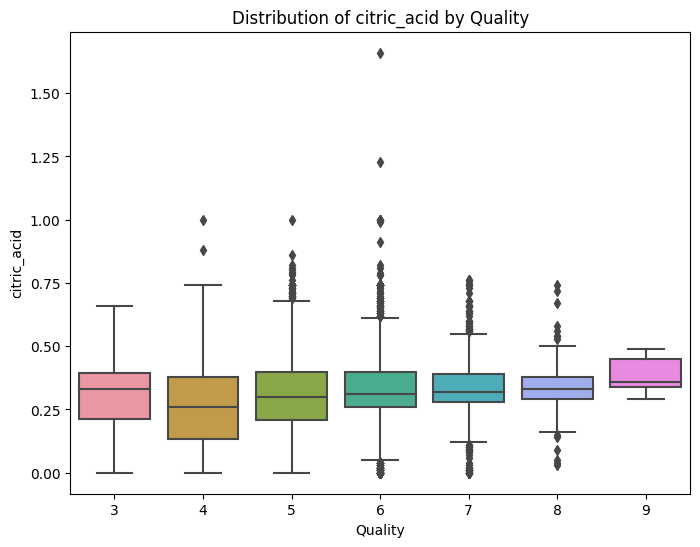

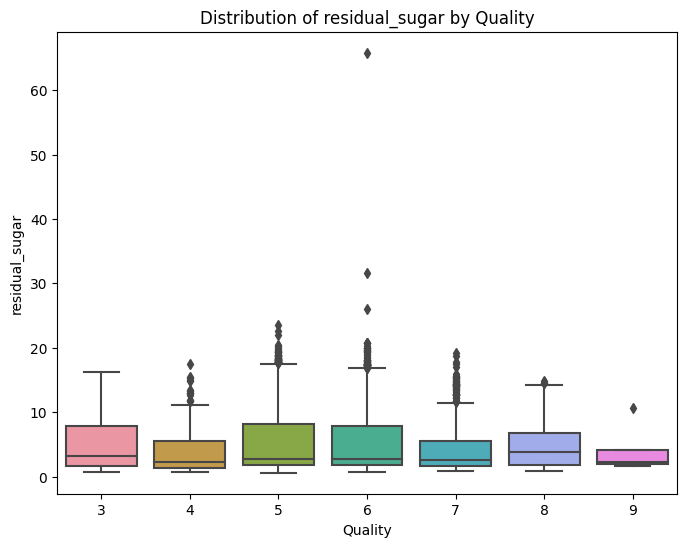

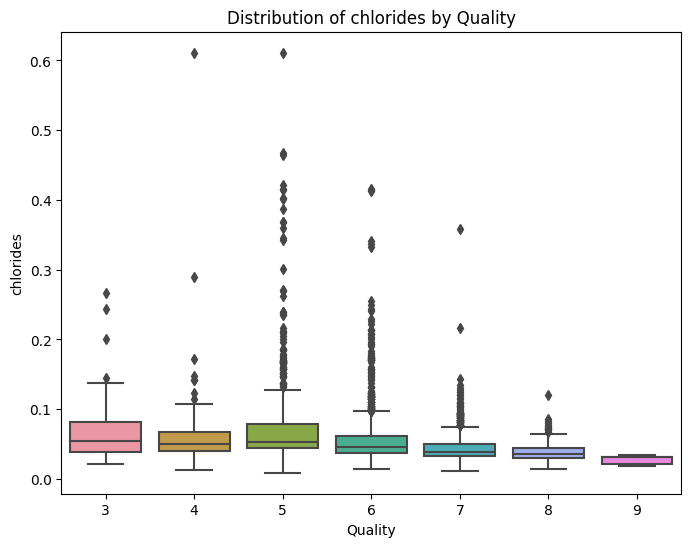

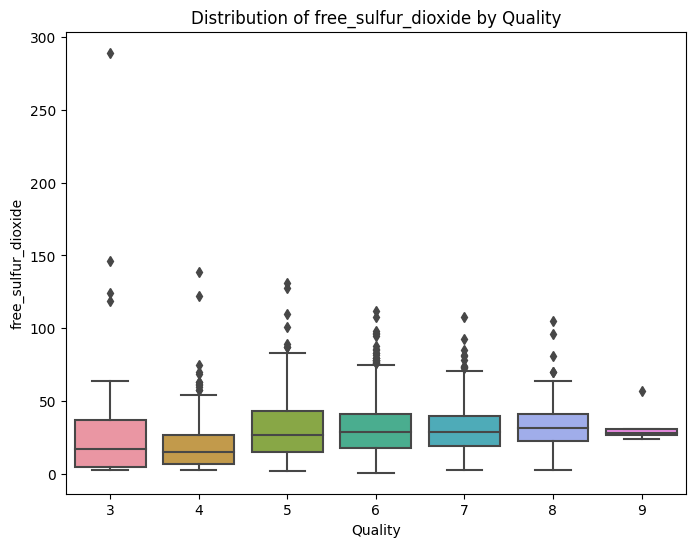

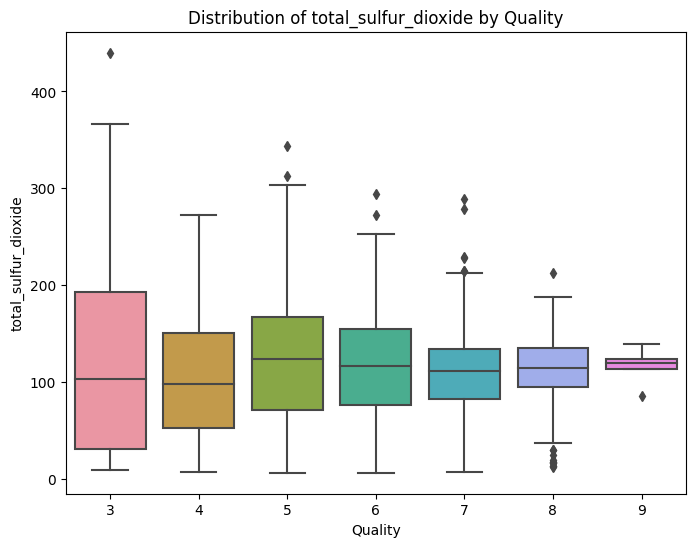

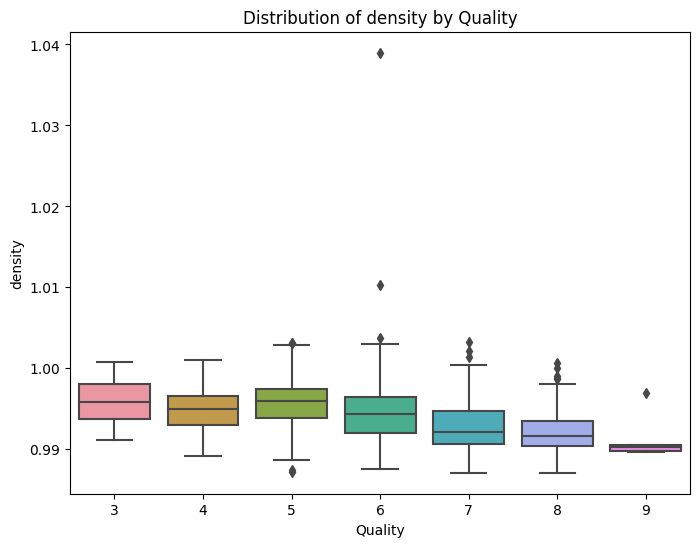

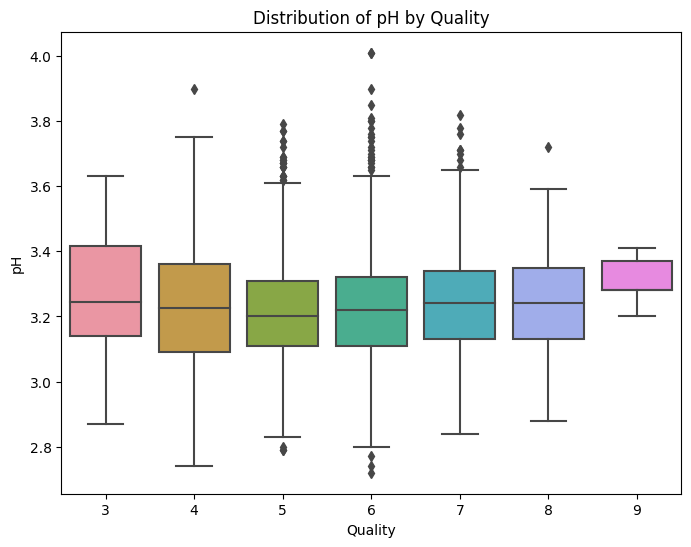

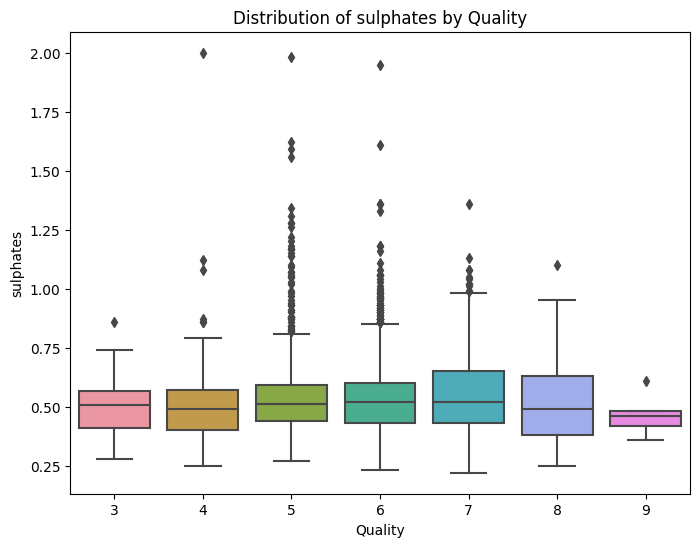

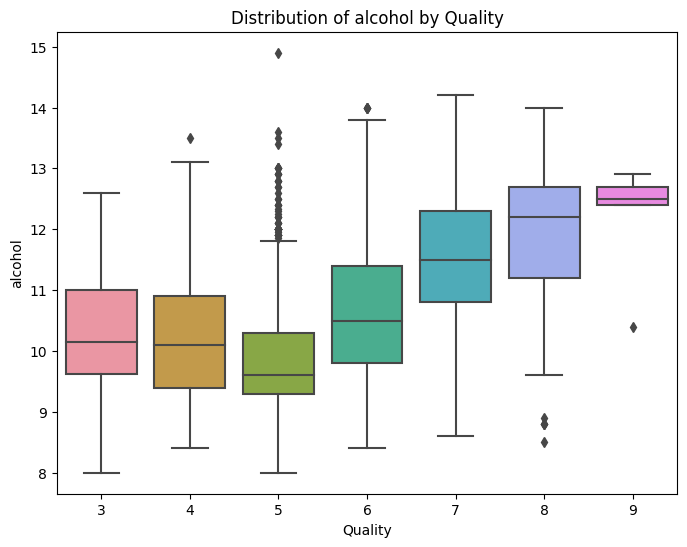

In [15]:
numeric_features = wine_df.iloc[:, 1:12]
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=wine_df)
    plt.title(f'Distribution of {feature} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

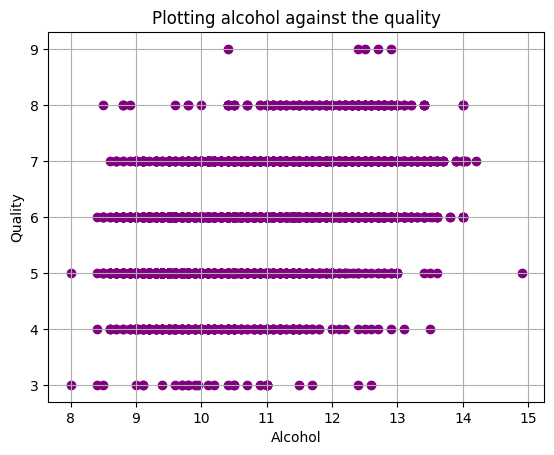

In [16]:
#Plot a scatter plot of alcohol against its quality
plt.scatter(wine_df['alcohol'],wine_df['quality'], color='purple')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()

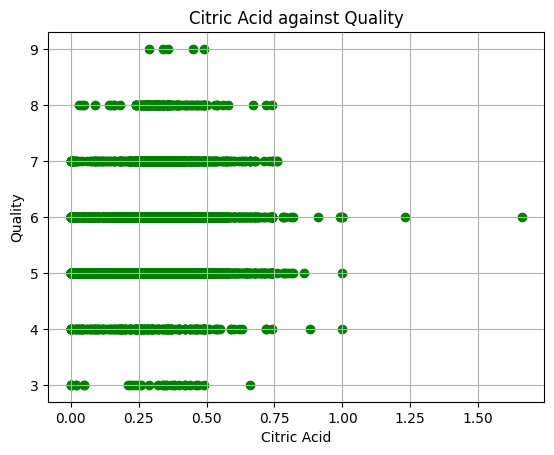

In [17]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(wine_df['citric_acid'],wine_df['quality'], color='green')
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.title('Citric Acid against Quality')
plt.grid(True)
plt.show()

From the previous plots we can see that there is no linear relationship between the target and the features. In addition, we can score the features to examine which ones show the most and least correlation with the target variable. 'alcohol' seems to be the one showing most correrlation, while for the others the predictive power seems lower.

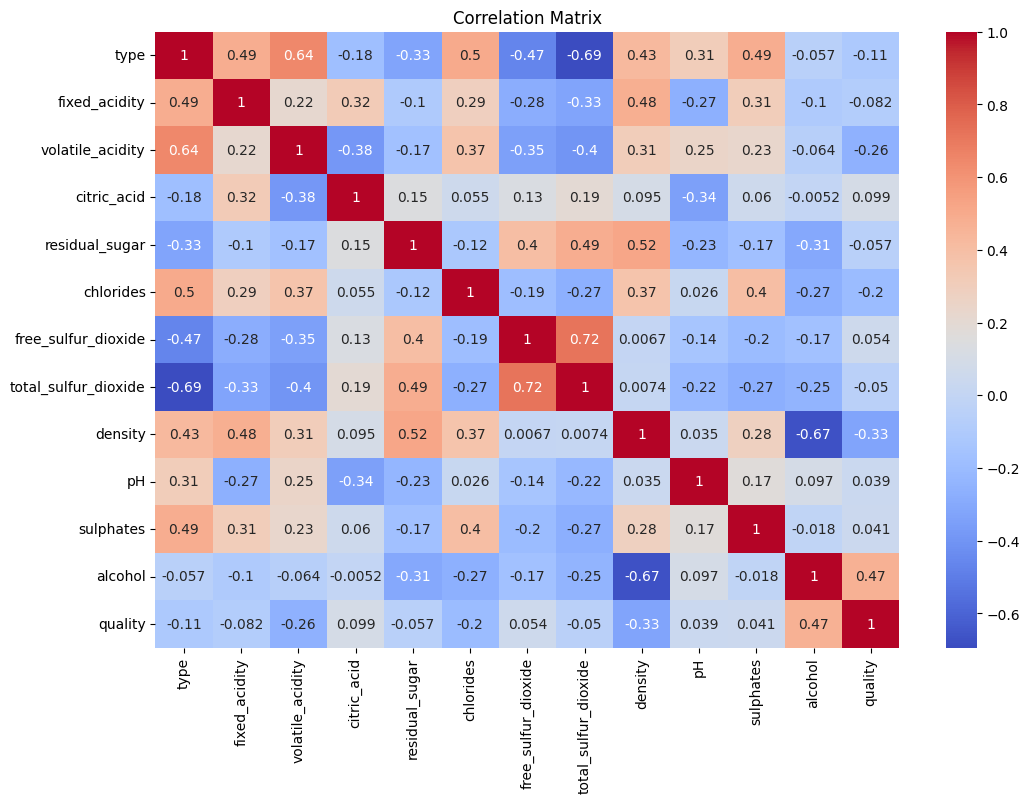

In [18]:
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Moreover, outliers can be spotted employing the Q1Q3 method, and analyzing which features are more prone to presenting them.

In [19]:
outlier_counts = {}

for column in wine_df.columns:
    if wine_df[column].dtype in ['float64', 'int64']:
        Q1 = wine_df[column].quantile(0.25)
        Q3 = wine_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
outlier_counts

{'type': 0,
 'fixed_acidity': 307,
 'volatile_acidity': 279,
 'citric_acid': 143,
 'residual_sugar': 142,
 'chlorides': 237,
 'free_sulfur_dioxide': 44,
 'total_sulfur_dioxide': 10,
 'density': 3,
 'pH': 49,
 'sulphates': 163,
 'alcohol': 1,
 'quality': 184}

Given the low predictive power, we decided to drop the features 'citric_acid', 'fixed_acidity' and 'residual_sugar', to favor the learning of meaningful relationships.

In [20]:
wine_df = wine_df.drop(columns=['citric_acid', 'fixed_acidity', 'residual_sugar'])
wine_df

,type,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,0.270,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,0.300,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,0.280,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,0.230,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,0,0.320,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...
6491,1,0.620,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,0.600,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,0.550,0.062,39.0,51.0,0.99512,3.52,0.55,11.2,6
6495,1,0.645,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


A pairplot is then employed for comprehensive relationship analysis.

In [21]:
# sns.pairplot(data=wine_df,hue='quality')

## Saving as Feature Group
Given the need for defining a dataset primary key, we decided to identify the index as key for each sample.

In [22]:
wine_df = wine_df.rename_axis('key').reset_index()
wine_df

,key,type,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,0,0.270,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,0,0.300,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,0,0.280,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,0,0.230,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6,0,0.320,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...
5324,6491,1,0.620,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
5325,6492,1,0.600,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5326,6493,1,0.550,0.062,39.0,51.0,0.99512,3.52,0.55,11.2,6
5327,6495,1,0.645,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Now we can write our historical feature values and labels to a feature group, and insert the dataframe into the feature store.

In [23]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_reduced_new",
    version=1,
    primary_key=["key"],
    description="Wine dataset reduced and preprocessed")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://35.204.254.42/p/119/fs/67/fg/13


Uploading Dataframe: 0.00% |          | Rows 0/5329 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_reduced_new_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://35.204.254.42/p/119/jobs/named/wine_reduced_new_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f79f5dc2890>, None)

The code below will prevent wine data from being written to the feature group if we write values outside the expected ranges.

In [24]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [25]:
suite = ExpectationSuite(expectation_suite_name="wine_values")

expect(suite, "volatile_acidity", 0.08, 1.58)
expect(suite, "chlorides", 0.009, 0.611)
expect(suite, "free_sulfur_dioxide", 1, 289)
expect(suite, "total_sulfur_dioxide", 6, 440)
expect(suite, "density", 0.98711, 1.03898)
expect(suite, "ph", 2.72, 4.01)
expect(suite, "sulphates", 0.22, 2)
expect(suite, "alcohol", 8, 14.9)


wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://35.204.254.42/p/119/fs/67/fg/13
